### Introduction to Bayesian Statistics

If you spend enough time in world of statistics you will eventually encounter discussions about 'Frequentists vs Bayesians'statistics.  Throughout the course, we have focused on frequentist statistics- how to carry out hypothesis testing, and calculate P-values. 

In frequentist statistics, we are saying that there is some ground truth in the thing that we are measuring, the mean, sd, or difference between treatments. As we increase our sample sizes we gain better estimates into the 'truth' using the techniques that we have covered.

Bayesians have a different intepretation of probability. Where we update our expectations based on the data, and try to form the most reasonable expectation.

The following cartoon is an example of frequentist statistics [taken to its extreme](https://xkcd.com/1132/).

In general, the majority of people are likely Bayesian by default. If we flip a coin 10 times and get 8 heads, we don't conclude that the coin is biased (though a frequentist probably wouldn't either), we have a strong 'prior' that a random coin is not biased, therefore we were just lucky (or unlucky).

A major difference is the presence of priors in Bayesian reasoning. In the cartoon, we have an incredibly strong prior that the sun has not exploded, so we reject the reasoning of the frequentist. In the event that the neutrino detecor was not hooked up to the die roll and it reported the sun had exploded, we would probably just conclude that the detector is broken, as opposed to concluding that the the sun exploded. 

### Bayes Theorem

Let's take an example. We have a drug screening test for on duty police offficers that checks for a specific drug.
We know that if an officer has been using the drug then 99% of the time the test will be positive. Similarly, if the officer has not been using the drug then 99% of the time the test will be negative. We know that 0.5% of the police force are using the drug.

If an officer scores a positive on the test, what is the chance that the officer has actually been taking the drug?

In [1]:
### Show of hands for 99%, 50-99%, 10-50%, less than 10%

Bayes rule is notoriously counter-intuitive when posed with problems like this.

Let's work through the formula:

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

In this case, $P(A|B)$ denotes the probability of being a user (A), given a positive test (B).

$P(A|B)$ is the probability of a positive test, given a that the subject is a user, $P(A)$ is the probability of being a user.

$P(B)$ is the probability of a positive test. In our case, it is the probability of a user scoring a positive, multiplied by the probability of being a user, plus the probability of a positive test for a non-user, multiplied by the probability of not being a user.

Let's do the math:

In [2]:
puser = 0.005
pnonuser = 1 - puser
puserpos = 0.99
pnonuserpos = 1 - 0.99

prob = (puserpos * puser)/(puserpos*puser + pnonuserpos*pnonuser)
#prob 

This is a problem! If we had simply done the test and told people that they were 99% liklely to have taken the drug, we would be completely wrong.

What we have done, is used a prior (in this case the p(user)) to make sure that we are sensible about interpreting our test. We know that drug use is rare in our population, so the majority of positive tests come from false positives.

Sensitivity and Specificity are the terms commonly used in medical diagnosis. In the above example our sensitivity is the probability that we detect a true drug user (0.99), and the specificity is the probability of correctly identifying a non-user (also 0.99 in our example, but not necessarily even). The  rarity of a disease will often cause false positives. You can imagine that even if we have a test for a disease which is 99% for both specificity and sensitivity if the disease is rare, the majority of positives will be errors.


### Exercise

When the details of the NSAs surveillance programs were leaked a few years back, the main criticisms came from civil  liberties issues- the government shouldn't be spying on citizens.

Let's take a different approach and see if it would even work. What if we accepted the premise that the surveillance is necessary.

Let's set the proportion of terrorists at 1/1000000 of the population, this is our prior. Whether or not this is reasonable, it seems to be roughly the correct size. This is often the strongest reasoning we will have to give for a prior!

We have a team of NSA data scientists create a model on the data, which has a 95% chance of detecting a terrorist (sensitivity), and 0.2% chance of a false positive (indentifying someone as a terrorist when they are not). 

1. What is the probability that someone identified as a terrorist by the NSA is a real terrorist?
2. Is this a useful model? How many false positives do we expect?
3. What recommendations do you have for the modeller, should they focus on false positives, false negatives, or give up?

### Naive Bayes Classification

Naive Bayes is a set of algorithms for classifying data based on *features*. In the simplest case, given a set of data, we can decide which class it belongs to based on its attributes. You can imagine the model looking at mammals vs birds and finding that the $P(bird|wings)$ is high, with some $(mammal|wings)$ from bats. It will carry out the probability for each independant variable we give and then find the most likely class.

The Naive Bayes classifier determines what *class* a given set of data belongs to, given the previous data that the model has been trained on.  Suppose we have many classes $C_1,C_2,\ldots,C_n$, and we represent the set of data to be classified as $\textbf{x} =  [x_1, x_2, \cdots , x_k]$.  The probability that the given data $\textbf{x}$ belongs to class $C_i$ is given by:

$$ P(C_i\,|\,\textbf{x}) = \frac{P(C_i)P(\textbf{x}\,|\,C_i)}{P(\textbf{x})}$$

We will carry out a few simple examples. Naive Bayes is often classified as a machine learning method, which we will discuss in a future leture. 

You can read the documentation here:
http://scikit-learn.org/stable/modules/naive_bayes.html

Let's use an example dataset, to cluster fruits versus vegetables:





In [3]:
import pandas as pd
import numpy as np
#data:
columns = ['Used in salads', 'Grows Underground', 'Served cooked', 'Needs Peeling', 'Fruit']

apple = [0,0,0,0,1]
tomato = [1,0,1,0,1]
potato = [0,1,1,1,0]
carrot = [1,1,0,1,0]
banana = [0,0,0,1,1]
turnip = [0,1,1,1,0]

data = pd.DataFrame([apple, tomato, potato, carrot, banana, turnip], columns = columns)

From here, we will use the classifier to figure out the probabilities - under the hood, here is effectively what is happening:

In [4]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

counts = {}
for label in np.unique(y):
    counts[label] = x[y == label].sum(axis = 0)
print(counts)

{0: array([1, 3, 2, 3]), 1: array([1, 0, 1, 1])}


The classifier then compares the frequency of each feature of x to each label in y, and calculates a probability that a new item with that attribute belongs to the class.

We use BernoulliNB here, as we have all 1/0 data. GaussianNB stores the mean and sd of each value for a continuous variable, and Mulitnomial allows multiple categorical values. When we see new data and we use the rule to classify it into the new bin:

In [5]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

nbmodel = BernoulliNB()
nbmodel.fit(x,y)

print(nbmodel.predict_proba(np.array([1,0,0,1]).reshape(1, -1))) #a pineapple, probability
print(nbmodel.predict(np.array([1,0,0,1]).reshape(1, -1))) #just predict

[[0.25 0.75]]
[1]


### Exercise

Create and fit a Gaussian Naive Bayes for the following data. Leave the animal names out of the model matrix.

| bird        | Animal  Name         | size(cm)  |  wings  | eggs | aquatic |
| ------------- |:-------------:| -----:|
| 0      | bat | 10 |1  | 0 | 0 |
| 0      | rat | 10 |0  | 0 | 0 |
| 0 | flying lizard |5  | 1 | 1 | 0|
| 1 | penguin |20  | 1 | 1 | 1|
| 1 | robin | 10 | 1| 1| 0|
| 1 | pigeon | 15 | 1| 1| 0|
| 1 | emu | 150 | 1| 1| 0|

Predict some more animals:

* Crocodile
* Otter
* Flying Squirrel
* Dog



### More Advanced Bayesian Statistics

Once things become more complicated we have a range of options in Bayesian statistics. Most of the models we have used so far can occur in Bayesian versions.

Using a Bayesian frameork, let's take a look at how we might determine if a coin was biased.

We know that a coin is expected to be 50:50 heads to tails. It is likely that we have previously treated it as a random sample of a 1 or 0. Now we have seen the Bernoulli distribution, we can treat it as a Bernoulli sample:

In [6]:
from scipy import stats

stats.bernoulli.rvs(0.5, size = 10) # 

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

Let's imagine I have a coin, and you have no prior about how it will behave. In this case, you have a uniform prior along the axis 0 to 1 for the proportion of coin tosses that will be heads.

This is a way of figuring out what type of distribution our prior can be based on by using mathematics. However, this math is somewhat advanced for this bootcamp (and for a number of statisticians). For now, let's say that our sample is generated by a known distribution, we can find a distribution that we expect the results of our sampling to look like. When it gets more complicated we need to use a software package to handle the math. PyMC3 is what we would normally use for Bayesian inference when needed in Python. Stan is a nice R package with similar functionality.

In the case of the Bernoulli Distribution, our 'conjugate' prior is the beta distribution, with it's two parameters as 1.

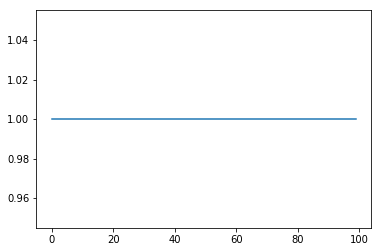

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

prior = stats.beta #prior distribution
rangetoplot = np.linspace(0, 1, 100) #0 to 1
plt.plot(prior.pdf(rangetoplot, 1, 1));

Now we can update our prior, based on observed data. Again, let's worry less about the math and focus on the idea that we can update our prior probability into a posterior, by seeing the oberved values:

2


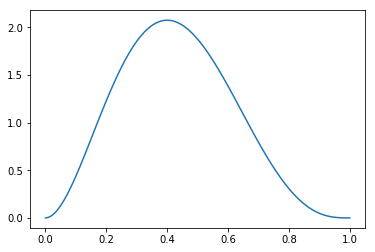

In [8]:
N = 5 # number of samples

data = stats.bernoulli.rvs(0.5, size = N) # samples
heads = data.sum()
y = prior.pdf(rangetoplot, 1 + heads, 1 + N - heads)
plt.plot(rangetoplot, y, label="observe %d tosses,\n %d heads" % (N, heads));
print(heads)

This is now our posterior distribution. This is how likely we think it is we will get heads coming forwards. Note it is technically not an estimate of the value, but of our belief in the value.

### Exercise

1. What happens as we increase N? Run N for `[1,5,10,15,50,200]`


### Extension, Optional - Bayesian inference with PyMC3

PyMC3 is the current 'state of art' in Bayesian inference in python. Once we have more complicated models the math becomes even more intractable(you can imagine if we had something similar to the linear regressions we have previously run). 

PyMC3 relies on us to tell it the expected priors and distributions of individual parameters, and then uses advanced math and sampling to calculate our priors by simulation. You can imagine it as simulating the data via our distributions and then inferring the posterior from them. The key here is creating the model, priors and parameters rely on how the which they are specified. The great part of PyMC3 is that as long as you have an idea of your model, you don't need the math to calculate anything!

A great resource on PyMC3 is the textbook ['Probabilistic Programming and Bayesian Methods for Hackers'](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/tree/master/), which this example is modified from.

Let's write our coin example in PyMC3:

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
logp = -2.5309, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 94.01it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_logodds__]
100%|██████████| 1500/1500 [00:00<00:00, 8413.92it/s]
The number of effective samples is smaller than 25% for some parameters.


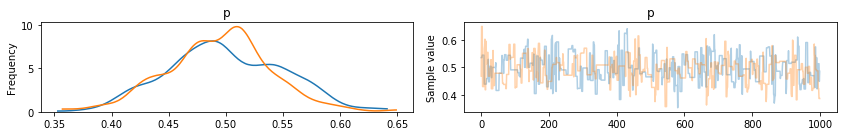

In [9]:
import pymc3 as pm
import scipy.stats as stats

N = 100

data = stats.bernoulli.rvs(0.5, size = N) # samples
heads = data.sum()

#priors of the distribution
alpha = 1 #prior of alpha
beta = 1 #prior of beta

niter = 1000 #number of times to simulate our data

with pm.Model() as model: # context management
    # define priors
    prior = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=N, p=prior, observed=heads)

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    pm.traceplot(trace)

In the backend, this is comping the core math to C and running it, as such, it may take some time to run!

We can plot our outcome:

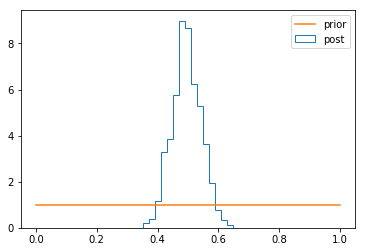

In [10]:
plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

### Exercises

1. Try changing the parameters of the prior, how does this change the posterior?
2. Try changing N (not too large!), how does this change the posterior?
3. Try changing the coin to be biased, do we get a better or worse posterior in the same number of samples?